# Attribution Demo with made-up news

In this demo, we load a news recommender trained on the english MIND dataset and try it on some news that we can simply type in.

In [ ]:
import pandas as pd
import numpy as np
from xnrs.explain import Explainer
from xnrs.evaluation import visualization as vis
from xnrs.models import get_checkpoint

## Initialization

You can use the `get_checkpoint()` method to load one of our pre-trained models from the web and store the checkpoint in the defined directory.
"xnrs_mind" is an explainable model implementing our standard archtiecture (details in the paper) that is trained on the MIND dataset.

In [ ]:
get_checkpoint(
    name='xnrs_mind',
    dst_dir='checkpoints/'
)

After downloading the model, we initialize our `Explainer` wrapper and load the model into it.
We set the argument `init_backbone=True` to also load the transformer backbone model that is used to initialize news embeddings.

In [3]:
model_path = 'checkpoints/xnrs_mind_checkpoint'
explainer = Explainer()
explainer.load_checkpoint(path=model_path, device='cuda:0', init_backbone=True)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## Constructing some Data

In this demo, we don't use real data but just make up a reading history and a candidate that we want to score against it.
Below you can simply type some news or copy them from somewhere.

In [4]:
# NOTE: these news are made up and might be fake-news..

candidate = ['Trump is running for presidency again.']

history = [
    'Brad Pit will retire next year.',
    'Trump claims he could end the war in Ukraine.',
    'Merkel and Macron take a week off together on Mallorca.',
    'Tomorrow will bring heavy thunder storms and rain.',
    'The republicans are more popular than ever.',
    'The German government keeps fighting about their social security system.',
    'Biden pulls back and Harris will follow.',
    'Meghan and Harry love their new lives.',
    'The US Olympics team does not win a single medal and returns home disappointed.'
]

## Explaining a Recommendation

We now use the `explain_score_from_str()` mehtod in our `Explainer` to compute the score of the above candidate recommendation and attribute it back onto the reading history to see which of these news the model takes into account for the given recommendation.

In [6]:
attributions, _, attribution_tot, score, _ = explainer.explain_score_from_str(
    history=history,
    candidate=candidate,
    n_steps=50
)

embedding history news


100%|██████████| 9/9 [00:00<00:00, 18.28it/s]


embedding candidate news


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


computing attributions


100%|██████████| 50/50 [00:00<00:00, 316.70it/s]


### Attribution Error

The sum of our attributions are theoretically guaranteed to converge towards the recommendation score for a large number of integration steps (`n_steps` above - see Section 3.2 and Figure 2 in the paper).
Therefore, we can quantify the error of our attributions by taking the absolute difference between their sum and the recommendation score.

In [7]:
print('Recommendation score:', score)
print('Attribution error:', np.abs(attribution_tot - score))


Recommendation score: 0.18671914935112
Attribution error: 1.2800097465515137e-05


### Visualizing attributions

The turn the attributions dict from above into a pandas DataFrame and sort it by the news level attributions.

In [8]:
attributions_df = pd.DataFrame(attributions).sort_values('news_attribution', ascending=False)
attributions_df

,title,tokens,news_attribution,token_attributions
4,The republicans are more popular than ever.,"[the, republicans, are, more, popular, than, e...",0.037528,"[0.0026575387, 0.01616958, 0.003658878, 0.0021..."
6,Biden pulls back and Harris will follow.,"[bid, ##en, pulls, back, and, harris, will, fo...",0.030268,"[0.0030373142, 0.006401923, 0.0019846624, 0.00..."
1,Trump claims he could end the war in Ukraine.,"[trump, claims, he, could, end, the, war, in, ...",0.029813,"[0.0011196835, 0.012047331, 0.0006180482, 0.00..."
5,The German government keeps fighting about the...,"[the, german, government, keeps, fighting, abo...",0.024366,"[0.0030266014, 0.0013812783, 0.00081254245, 0...."
3,Tomorrow will bring heavy thunder storms and r...,"[tomorrow, will, bring, heavy, thunder, storms...",0.018189,"[0.0033240071, 0.0030678757, 0.00081224483, 0...."
2,Merkel and Macron take a week off together on ...,"[mer, ##kel, and, macro, ##n, take, a, week, o...",0.014872,"[0.0014745018, 0.0052548023, 0.0015168976, 0.0..."
7,Meghan and Harry love their new lives.,"[meg, ##han, and, harry, love, their, new, liv...",0.014837,"[0.0011605198, 0.005040152, 0.0016288565, 0.00..."
8,The US Olympics team does not win a single med...,"[the, us, olympics, team, does, not, win, a, s...",0.014238,"[0.0016850038, 0.0010029973, 0.00051423913, 0...."
0,Brad Pit will retire next year.,"[brad, pit, will, retire, next, year, .]",0.002620,"[0.0016421991, -0.0018965492, 0.0011343177, 0...."


Using the `plot_history_attributions()` method we can create a simple plot for the token leven attributions

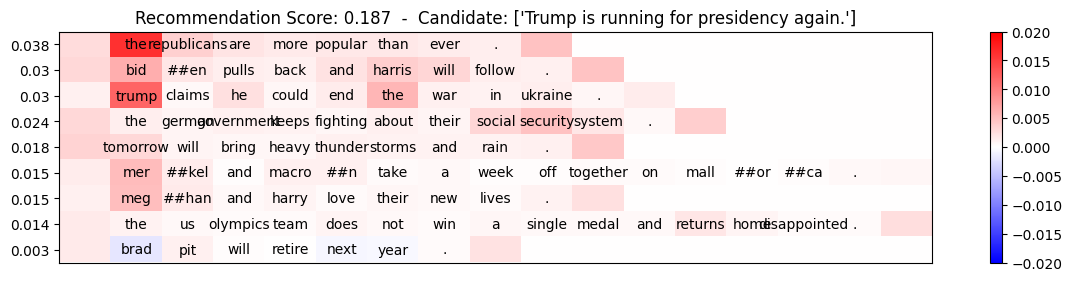

In [9]:
fig = vis.plot_history_attributions(attributions, candidate)
fig.show()

The `history_attributions_to_latex()` method turns attributions into code for a latex table which results in a nicer visualization for token attributions.

In [10]:
tex = vis.history_attributions_to_latex(attributions)
print(tex)

0.038 &  \adjustbox{bgcolor=red!100.0}{\strut the} \adjustbox{bgcolor=red!22.6}{\strut republicans} are more popular than ever . \\
0.030 &  \adjustbox{bgcolor=red!39.6}{\strut bid}en pulls back and \adjustbox{bgcolor=red!23.9}{\strut harris} \adjustbox{bgcolor=red!19.6}{\strut will} follow . \\
0.030 &  \adjustbox{bgcolor=red!74.5}{\strut trump} claims \adjustbox{bgcolor=red!15.2}{\strut he} could end \adjustbox{bgcolor=red!35.6}{\strut the} war in ukraine . \\
0.024 &  the german government keeps fighting about their \adjustbox{bgcolor=red!19.8}{\strut social} \adjustbox{bgcolor=red!29.2}{\strut security} system . \\
0.018 &  \adjustbox{bgcolor=red!19.0}{\strut tomorrow} will bring heavy thunder storms and rain . \\
0.015 &  \adjustbox{bgcolor=red!32.5}{\strut mer}kel and macron take a week off together on mallorca . \\
0.015 &  \adjustbox{bgcolor=red!31.2}{\strut meg}han and harry love their new lives . \\
0.014 &  the us olympics team does not win a single medal and returns home di